In [126]:
# Initial imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean, mode
from pathlib import Path
from imblearn.pipeline import Pipeline
# from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, StratifiedKFold, GridSearchCV, cross_val_score, cross_validate, validation_curve
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

In [52]:
# Loading data
file_path = Path("../eda/reduced_filtered_df.csv")
df = pd.read_csv(file_path)
df.head(1)

,ACD,LT,VCD,SPORTHR,DADMY,delta_spheq,total_positive_screen,MYOPIC
0,3.702,3.392,15.29,4,1,1.358,8,0


In [53]:
# Check dataset balance
df["MYOPIC"].value_counts()

0    323
1     49
Name: MYOPIC, dtype: int64

In [54]:
# Define X,y
label = df["MYOPIC"]
X = df.iloc[:,:-1].copy()

In [55]:
# Holdback Method with stratify as True
X_train, X_test, y_train, y_test = train_test_split(X, label, random_state=42, stratify=label)

In [56]:
len(y_test)

93

## SVC Unbalanced Data
- linear kernel

In [57]:
# create process steps
pipes = [
    ("scaler", StandardScaler()),
    ("svc", SVC(random_state=2))
]

# create pipeline
pipeline = Pipeline(pipes)

# Train the scaler with the X_train data.
pipeline.fit(X_train, y_train)

# evaluate model
print(f"Score:  {pipeline.score(X_train, y_train):>10}")

y_train_pred = pipeline.predict(X_train)
print(f" Training Classification Report:  \n {classification_report(y_train, y_train_pred)}")
print(f"-----"*10)
y_test_pred = pipeline.predict(X_test)
print(f" Testing Classification Report:  \n {classification_report(y_test, y_test_pred)}")


Score:  0.8888888888888888
 Training Classification Report:  
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       242
           1       1.00      0.16      0.28        37

    accuracy                           0.89       279
   macro avg       0.94      0.58      0.61       279
weighted avg       0.90      0.89      0.85       279

--------------------------------------------------
 Training Classification Report:  
               precision    recall  f1-score   support

           0       0.88      1.00      0.94        81
           1       1.00      0.08      0.15        12

    accuracy                           0.88        93
   macro avg       0.94      0.54      0.55        93
weighted avg       0.90      0.88      0.84        93



## SVC Unbalanced Data GridsearchCV

In [63]:
# create process steps
pipes = [
    ("scaler", StandardScaler()),
    ("svc", SVC(random_state=2))
]

# create pipeline
pipeline = Pipeline(pipes)

# set gridsearch parameters
params = {
    "svc__C": [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 50, 100, 1000]
}

# gridsearch with 5 fold cross validation setup
grid = GridSearchCV(pipeline, params);

# Train the scaler with the X_train data.
grid.fit(X_train, y_train)

# evaluate model
print(f"Score:  {grid.score(X_train, y_train):>10}")

y_train_pred = grid.predict(X_train)
print(f" Training Classification Report:  \n {classification_report(y_train, y_train_pred)}")
print(f"-----"*10)
y_test_pred = grid.predict(X_test)
print(f" Testing Classification Report:  \n {classification_report(y_test, y_test_pred)}")

Score:  0.8924731182795699
 Classification Report:  
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       242
           1       0.82      0.24      0.38        37

    accuracy                           0.89       279
   macro avg       0.86      0.62      0.66       279
weighted avg       0.89      0.89      0.87       279

--------------------------------------------------
 Training Classification Report:  
               precision    recall  f1-score   support

           0       0.91      1.00      0.95        81
           1       1.00      0.33      0.50        12

    accuracy                           0.91        93
   macro avg       0.96      0.67      0.73        93
weighted avg       0.92      0.91      0.89        93



In [64]:
# print params
grid.best_params_

{'svc__C': 100, 'svc__gamma': 0.01}

## SVC Unbalanced Data PCA GridsearchCV

In [76]:
# create process steps
pipes = [
    ("scaler", StandardScaler()),
    ("pca", PCA(random_state=1)),
    ("svc", SVC(random_state=2))
]

# create pipeline
pipeline = Pipeline(pipes)

# set gridsearch parameters
params = {
    "svc__C": [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 50, 100, 1000],
    "pca__n_components":[4,5,6,7]
}

# gridsearch with 5 fold cross validation setup
grid = GridSearchCV(pipeline, params);

# Train the scaler with the X_train data.
grid.fit(X_train, y_train)

# evaluate model
print(f"Score:  {grid.score(X_train, y_train):>10}")

y_train_pred = grid.predict(X_train)
print(f"Training Classification Report:  \n {classification_report(y_train, y_train_pred)}")
print(f"-----"*10)
y_test_pred = grid.predict(X_test)
print(f"Testing Classification Report:  \n {classification_report(y_test, y_test_pred)}")

Score:  0.8853046594982079
 Classification Report:  
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       242
           1       0.86      0.16      0.27        37

    accuracy                           0.89       279
   macro avg       0.87      0.58      0.61       279
weighted avg       0.88      0.89      0.85       279

--------------------------------------------------
 Training Classification Report:  
               precision    recall  f1-score   support

           0       0.91      1.00      0.95        81
           1       1.00      0.33      0.50        12

    accuracy                           0.91        93
   macro avg       0.96      0.67      0.73        93
weighted avg       0.92      0.91      0.89        93



In [77]:
# print params
grid.best_params_

{'pca__n_components': 4, 'svc__C': 5, 'svc__gamma': 0.1}

## SVC Balanced Data

In [78]:
# create process steps
pipes = [
    ("over", SMOTE(random_state=1)),
    ("scaler", StandardScaler()),
    ("svc", SVC(random_state=2))
]

# create pipeline
pipeline = Pipeline(pipes)

# Train the scaler with the X_train data.
pipeline.fit(X_train, y_train)

# evaluate model
print(f"Score:  {pipeline.score(X_train, y_train):>10}")

y_train_pred = pipeline.predict(X_train)
print(f"Training Classification Report:  \n {classification_report(y_train, y_train_pred)}")
print(f"-----"*10)
y_test_pred = pipeline.predict(X_test)
print(f"Testing Classification Report:  \n {classification_report(y_test, y_test_pred)}")

Score:  0.8709677419354839
 Classification Report:  
               precision    recall  f1-score   support

           0       0.98      0.87      0.92       242
           1       0.51      0.89      0.65        37

    accuracy                           0.87       279
   macro avg       0.74      0.88      0.78       279
weighted avg       0.92      0.87      0.88       279

--------------------------------------------------
 Training Classification Report:  
               precision    recall  f1-score   support

           0       0.92      0.88      0.90        81
           1       0.38      0.50      0.43        12

    accuracy                           0.83        93
   macro avg       0.65      0.69      0.66        93
weighted avg       0.85      0.83      0.84        93



## SVC Balanced Data PCA GridsearchCV

In [79]:
# create process steps
pipes = [
    ("over", SMOTE(random_state=1)),
    ("scaler", StandardScaler()),
    ("pca", PCA(random_state=1)),
    ("svc", SVC(random_state=2))
]

# create pipeline
pipeline = Pipeline(pipes)

# set gridsearch parameters
params = {
    "svc__C": [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 50, 100, 1000],
    "pca__n_components":[4,5,6,7]
}

# gridsearch with 5 fold cross validation setup
grid = GridSearchCV(pipeline, params);

# Train the scaler with the X_train data.
grid.fit(X_train, y_train)

# evaluate model
print(f"Score:  {grid.score(X_train, y_train):>10}")

y_train_pred = grid.predict(X_train)
print(f"Training Classification Report:  \n {classification_report(y_train, y_train_pred)}")
print(f"-----"*10)
y_test_pred = grid.predict(X_test)
print(f"Testing Classification Report:  \n {classification_report(y_test, y_test_pred)}")

Score:  0.978494623655914
 Classification Report:  
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       242
           1       1.00      0.84      0.91        37

    accuracy                           0.98       279
   macro avg       0.99      0.92      0.95       279
weighted avg       0.98      0.98      0.98       279

--------------------------------------------------
 Training Classification Report:  
               precision    recall  f1-score   support

           0       0.87      1.00      0.93        81
           1       0.00      0.00      0.00        12

    accuracy                           0.87        93
   macro avg       0.44      0.50      0.47        93
weighted avg       0.76      0.87      0.81        93



C:\Users\ejwda\Anaconda3\envs\PythonDataS2022\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ejwda\Anaconda3\envs\PythonDataS2022\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ejwda\Anaconda3\envs\PythonDataS2022\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

In [80]:
# print params
grid.best_params_

{'pca__n_components': 5, 'svc__C': 0.0001, 'svc__gamma': 10}

## SVC Balanced Data Weighted GridsearchCV

In [70]:
# create process steps
pipes = [
    ("over", SMOTE(random_state=1)),
    ("scaler", StandardScaler()),
    ("svc", SVC(random_state=2, class_weight='balanced'))
]

# create pipeline
pipeline = Pipeline(pipes)

# set gridsearch parameters
params = {
    "svc__C": [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 50, 100, 1000],
}

# gridsearch with 5 fold cross validation setup
grid = GridSearchCV(pipeline, params);

# Train the scaler with the X_train data.
grid.fit(X_train, y_train)

# evaluate model
print(f"Score:  {grid.score(X_train, y_train):>10}")

y_train_pred = grid.predict(X_train)
print(f"Training Classification Report:  \n {classification_report(y_train, y_train_pred)}")
print(f"-----"*10)
y_test_pred = grid.predict(X_test)
print(f"Testing Classification Report:  \n {classification_report(y_test, y_test_pred)}")

Score:  0.9283154121863799
 Classification Report:  
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       242
           1       0.90      0.51      0.66        37

    accuracy                           0.93       279
   macro avg       0.92      0.75      0.81       279
weighted avg       0.93      0.93      0.92       279

--------------------------------------------------
 Training Classification Report:  
               precision    recall  f1-score   support

           0       0.88      1.00      0.94        81
           1       1.00      0.08      0.15        12

    accuracy                           0.88        93
   macro avg       0.94      0.54      0.55        93
weighted avg       0.90      0.88      0.84        93



In [71]:
# print params
grid.best_params_

{'svc__C': 0.0001, 'svc__gamma': 1}

In [ ]:
# evaluation metrics
scoring = ('f1', 'recall', 'precision', 'roc_auc')

# 5 fold cross validation
cv = StratifiedKFold(n_splits=5)

# create process steps
pipes = [
    ("over", SMOTE(random_state=1)),
    ("scaler", StandardScaler()),
    ("svc", SVC(random_state=2, class_weight='balanced', C= 0.0001))
]

# create pipeline
pipeline = Pipeline(pipes)

# evaluate pipeline
scores = cross_validate(pipeline, X_train, y_train, scoring=scoring, cv=cv, n_jobs=-1)
print('Mean f1: %.3f' % mean(scores['test_f1']))
print('Mean recall: %.3f' % mean(scores['test_recall']))
print('Mean precision: %.3f' % mean(scores['test_precision']))
print('Mean ROC AUC: %.3f' % mean(scores['test_roc_auc']))
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(f"-----"*10)
print(classification_report(y_test, y_pred))

## SVC Balanced Data PCA Weighted GridsearchCV 

In [143]:
# create process steps
pipes = [
    ("over", SMOTE(random_state=1)),
    ("scaler", StandardScaler()),
    ("pca", PCA(random_state=1)),
    ("svc", SVC(random_state=2, class_weight='balanced'))
]

# create pipeline
pipeline = Pipeline(pipes)

# set gridsearch parameters
params = {
    "svc__C": [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 50, 100, 1000],
    "pca__n_components":[4,5,6,7]
}

# gridsearch with 5 fold cross validation setup
grid = GridSearchCV(pipeline, params);

# Train the scaler with the X_train data.
grid.fit(X_train, y_train)

# evaluate model
print(f"Score:  {grid.score(X_train, y_train):>10}")

y_train_pred = grid.predict(X_train)
print(f" Training Classification Report:  \n {classification_report(y_train, y_train_pred)}")
print(f"-----"*10)
y_test_pred = grid.predict(X_test)
print(f"Testing Classification Report:  \n {classification_report(y_test, y_test_pred)}")

Score:  0.996415770609319
 Training Classification Report:  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       242
           1       0.97      1.00      0.99        37

    accuracy                           1.00       279
   macro avg       0.99      1.00      0.99       279
weighted avg       1.00      1.00      1.00       279

--------------------------------------------------
Testing Classification Report:  
               precision    recall  f1-score   support

           0       0.90      0.85      0.87        81
           1       0.25      0.33      0.29        12

    accuracy                           0.78        93
   macro avg       0.57      0.59      0.58        93
weighted avg       0.81      0.78      0.80        93



In [144]:
# print params
grid.best_params_

{'pca__n_components': 5, 'svc__C': 1000}

In [145]:
# Training is most likely overfitting
# Need to limit turning parameters to generalize the fit so 
# Will manually increase the C and decrease gamma

In [146]:
# create process steps
pipes = [
    ("over", SMOTE(random_state=1)),
    ("scaler", StandardScaler()),
    ("pca", PCA(random_state=1)),
    ("svc", SVC(random_state=2, class_weight='balanced'))
]

# create pipeline
pipeline = Pipeline(pipes)

# set gridsearch parameters
params = {
    "svc__C": [1000,2000, 5000, 10000],
    "pca__n_components":[4,5,6,7]
}

# gridsearch with 5 fold cross validation setup
grid = GridSearchCV(pipeline, params);

# Train the scaler with the X_train data.
grid.fit(X_train, y_train)

# evaluate model
print(f"Score:  {grid.score(X_train, y_train):>10}")

y_train_pred = grid.predict(X_train)
print(f" Classification Report:  \n {classification_report(y_train, y_train_pred)}")
print(f"-----"*10)
y_test_pred = grid.predict(X_test)
print(f" Training Classification Report:  \n {classification_report(y_test, y_test_pred)}")

Score:  0.996415770609319
 Classification Report:  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       242
           1       0.97      1.00      0.99        37

    accuracy                           1.00       279
   macro avg       0.99      1.00      0.99       279
weighted avg       1.00      1.00      1.00       279

--------------------------------------------------
 Training Classification Report:  
               precision    recall  f1-score   support

           0       0.90      0.85      0.87        81
           1       0.25      0.33      0.29        12

    accuracy                           0.78        93
   macro avg       0.57      0.59      0.58        93
weighted avg       0.81      0.78      0.80        93



In [147]:
# The training and testing are starting to converge

# print params
grid.best_params_

{'pca__n_components': 5, 'svc__C': 1000}

### Retest Method

In [148]:
# create process steps
pipes = [
    ("over", SMOTE(random_state=1)),
    ("scaler", StandardScaler()),
    ("pca", PCA(random_state=1, n_components=6)),
    ("svc", SVC(random_state=2, class_weight='balanced', C= 2000))
]

# create pipeline
pipeline = Pipeline(pipes)

# Train the scaler with the X_train data.
pipeline.fit(X_train, y_train)

# evaluate model
print(f"Training Score:  {pipeline.score(X_train, y_train):>10}")

y_train_pred = pipeline.predict(X_train)
print(f" Classification Report:  \n {classification_report(y_train, y_train_pred)}")
print(f"-----"*10)
y_test_pred = pipeline.predict(X_test)
print(f" Training Classification Report:  \n {classification_report(y_test, y_test_pred)}")

Training Score:         1.0
 Classification Report:  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       242
           1       1.00      1.00      1.00        37

    accuracy                           1.00       279
   macro avg       1.00      1.00      1.00       279
weighted avg       1.00      1.00      1.00       279

--------------------------------------------------
 Training Classification Report:  
               precision    recall  f1-score   support

           0       0.91      0.88      0.89        81
           1       0.33      0.42      0.37        12

    accuracy                           0.82        93
   macro avg       0.62      0.65      0.63        93
weighted avg       0.84      0.82      0.83        93



### Different Cross Validation Method

In [149]:
# evaluation metrics
scoring = ('f1', 'recall', 'precision', 'roc_auc')

# 5 fold cross validation
cv = StratifiedKFold(n_splits=5)

# create process steps
pipes = [
    ("over", SMOTE(random_state=1)),
    ("scaler", StandardScaler()),
    ("pca", PCA(random_state=1, n_components=6)),
    ("svc", SVC(random_state=2, class_weight='balanced', C= 2000))
]

# create pipeline
pipeline = Pipeline(pipes)

# evaluate pipeline
scores = cross_validate(pipeline, X_train, y_train, scoring=scoring, cv=cv, n_jobs=-1)
print('Mean f1: %.3f' % mean(scores['test_f1']))
print('Mean recall: %.3f' % mean(scores['test_recall']))
print('Mean precision: %.3f' % mean(scores['test_precision']))
print('Mean ROC AUC: %.3f' % mean(scores['test_roc_auc']))
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(f"-----"*10)
print(classification_report(y_test, y_pred))

Mean f1: 0.457
Mean recall: 0.571
Mean precision: 0.395
Mean ROC AUC: 0.777
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.88      0.89        81
           1       0.33      0.42      0.37        12

    accuracy                           0.82        93
   macro avg       0.62      0.65      0.63        93
weighted avg       0.84      0.82      0.83        93



In [151]:
# Validation curve
param_range = [0.001, 0.01, 0.1, 1, 10.0, 20.0]

train_scores, test_scores = validation_curve(estimator=pipeline,
                                             X=X_train, y=y_train,
                                             cv=5,
                                             param_name='svc__C', 
                                             param_range=param_range)

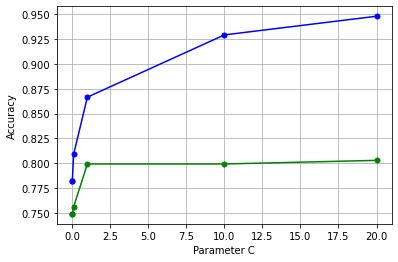

In [152]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(param_range, train_mean,
         marker='o', markersize=5,
         color='blue', label='Training Accuracy')
plt.plot(param_range, test_mean,
         marker='o', markersize=5,
         color='green', label='Validation Accuracy')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.grid()
plt.show()


## Analysis